# Check

In [1]:
from CactusTool.funcs import check

In [2]:
file = '/Users/liuyu/simulations/GW150914/phi.0.xy.h5'
import os
import re
def hdf5_check(file):
    assert os.path.exists(file), "{} doesn't exist in your local computer".format(file)
    pat_fn = re.compile("\S*\.([xyz]*)\.h5$")
    m = pat_fn.match(file)
    if m:
        return m.group(1)
    else:
        raise ValueError("%s is not HDF5 file" % os.path.basename(file))
a = hdf5_check(file)
print(a)
print('OK')

xy
OK


# file

In [3]:
from CactusTool.funcs.file import dataframe_h5

In [4]:
# file = '/Users/liuyu/simulations/GW150914/phi.0.xy.h5'
# dataframe_h5(file, 'xy')

In [5]:
# X = np.arange(0,10)
# Y = np.arange(10,20)
# Z = np.arange(20,30)
# tuple(X, Y, Z)

In [6]:
# np.meshgrid(a)

In [7]:
# coord = [X, Y, Z]
# dim = 3
# a = tuple(coord[i] for i in range(dim))
# print(a)

In [8]:
import CactusTool

In [9]:
path = '/Users/liuyu/simulations/BH/'
sim = CactusTool.load(path)

In [10]:
var = sim.H5.xy['H']

In [11]:
var.dataset

,x,y,H,rl,it,time,c
0,-230.00000,-230.0000,-1.312429e-12,0,0,0.0,0
1,-220.00000,-230.0000,-1.312429e-12,0,0,0.0,0
2,-210.00000,-230.0000,-1.312429e-12,0,0,0.0,0
3,-200.00000,-230.0000,-1.312429e-12,0,0,0.0,0
4,-190.00000,-230.0000,-1.551929e-12,0,0,0.0,0
...,...,...,...,...,...,...,...
565,-2.96875,0.9375,6.596199e-03,6,9984,39.0,9
566,-2.81250,0.9375,8.107562e-03,6,9984,39.0,9
567,-2.65625,0.9375,9.574487e-03,6,9984,39.0,9
568,-2.50000,0.9375,1.131892e-02,6,9984,39.0,9


In [12]:
import pandas as pd
dataset = var.dataset[var.dataset.it == 0]
column = ['rl', 'c', 'H']
for dim in ['x', 'y']:
    column += dim
dset = pd.DataFrame(dataset, columns=column) 

In [13]:
from scipy.interpolate import griddata
points = tuple([dset[dim].values for dim in ['x', 'y']])
coords = tuple([dset[dim].values for dim in ['x', 'y']])
# f = griddata(points, dset['H'].values, np.meshgrid(*coords), method='nearest')

In [14]:
# f

In [19]:
a = griddata(points, dset['H'].values, points, method='nearest')

In [21]:
a

array([-1.31242938e-12, -1.31242938e-12, -1.31242938e-12, ...,
        4.35767644e-08, -6.10905256e-09, -7.91307467e-08])

In [22]:
coords

(array([-230.     , -220.     , -210.     , ...,    0.625  ,    0.78125,
           0.9375 ]),
 array([-230.     , -230.     , -230.     , ...,    2.03125,    2.03125,
           2.03125]))

In [37]:
# for i in range(len(coords)):
#     a = np.unique(coords[i])
#     print(a)
co = tuple([np.sort(np.unique(coords[i])) for i in range(len(coords))])
gr = tuple(np.meshgrid(*co))

In [38]:
gr

(array([[-230., -220., -210., ...,  200.,  210.,  220.],
        [-230., -220., -210., ...,  200.,  210.,  220.],
        [-230., -220., -210., ...,  200.,  210.,  220.],
        ...,
        [-230., -220., -210., ...,  200.,  210.,  220.],
        [-230., -220., -210., ...,  200.,  210.,  220.],
        [-230., -220., -210., ...,  200.,  210.,  220.]]),
 array([[-230., -230., -230., ..., -230., -230., -230.],
        [-220., -220., -220., ..., -220., -220., -220.],
        [-210., -210., -210., ..., -210., -210., -210.],
        ...,
        [ 200.,  200.,  200., ...,  200.,  200.,  200.],
        [ 210.,  210.,  210., ...,  210.,  210.,  210.],
        [ 220.,  220.,  220., ...,  220.,  220.,  220.]]))

In [40]:
a = griddata(points, dset['H'].values, gr, method='nearest')

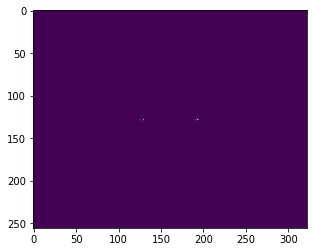

In [43]:
import matplotlib.pyplot as plt
plt.imshow(a)

# Array

In [1]:
from CactusTool.funcs import array

In [ ]:
array.arithmetic_progression()